# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
from functools import reduce

from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)
#print(cities)

597

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="

# set up lists to hold reponse info
number = 1
lat = []
temp = []
name = []
lng = []
humidity = []
cloudy = []
wind = []
country = []
date = []
town = []
#cities = ['London']

In [4]:
# Loop through the list of cities and perform a request for data on each
for city in cities:
    try:
        response = requests.get(query_url + city).json()
        #response.append(city_data)
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        humidity.append(response['main']['humidity'])
        name.append(response['name'])
        temp.append(response['main']['temp_max'])
        cloudy.append(response['clouds']['all'])
        wind.append(response['wind']['speed'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        town.append(city)
    
        print(f"Processing Record {number} of Set {len(cities)} complete | Added{city}")
        number +=1
    except:
        print(f'Missing data in city number {number} of {len(cities)}. | Skipping {city}')
        number += 1
    print("------------------------------\nData Retrieval Complete\n------------------------------")
    #print(results)

#print(json.dumps(response, indent=4, sort_keys=True))

Missing data in city number 1 of 597. | Skipping rungata
------------------------------
Data Retrieval Complete
------------------------------
Missing data in city number 2 of 597. | Skipping mys shmidta
------------------------------
Data Retrieval Complete
------------------------------
Processing Record 3 of Set 597 complete | Addedavarua
------------------------------
Data Retrieval Complete
------------------------------
Processing Record 4 of Set 597 complete | Addedyumen
------------------------------
Data Retrieval Complete
------------------------------
Processing Record 5 of Set 597 complete | Addedushuaia
------------------------------
Data Retrieval Complete
------------------------------
Processing Record 6 of Set 597 complete | Addeduarini
------------------------------
Data Retrieval Complete
------------------------------
Processing Record 7 of Set 597 complete | Addedpunta arenas
------------------------------
Data Retrieval Complete
------------------------------
Proc

Missing data in city number 60 of 597. | Skipping illoqqortoormiut
------------------------------
Data Retrieval Complete
------------------------------
Processing Record 61 of Set 597 complete | Addedduki
------------------------------
Data Retrieval Complete
------------------------------
Processing Record 62 of Set 597 complete | Addeduray
------------------------------
Data Retrieval Complete
------------------------------
Processing Record 63 of Set 597 complete | Addedbengkulu
------------------------------
Data Retrieval Complete
------------------------------
Missing data in city number 64 of 597. | Skipping nizhneyansk
------------------------------
Data Retrieval Complete
------------------------------
Processing Record 65 of Set 597 complete | Addedavera
------------------------------
Data Retrieval Complete
------------------------------
Processing Record 66 of Set 597 complete | Addedsrandakan
------------------------------
Data Retrieval Complete
-------------------------

Missing data in city number 118 of 597. | Skipping aflu
------------------------------
Data Retrieval Complete
------------------------------
Processing Record 119 of Set 597 complete | Addedconstitucion
------------------------------
Data Retrieval Complete
------------------------------
Processing Record 120 of Set 597 complete | Addedlasa
------------------------------
Data Retrieval Complete
------------------------------
Processing Record 121 of Set 597 complete | Addedchurapcha
------------------------------
Data Retrieval Complete
------------------------------
Processing Record 122 of Set 597 complete | Addedsitka
------------------------------
Data Retrieval Complete
------------------------------
Processing Record 123 of Set 597 complete | Addedarraial do cabo
------------------------------
Data Retrieval Complete
------------------------------
Processing Record 124 of Set 597 complete | Addedporto novo
------------------------------
Data Retrieval Complete
------------------

Processing Record 176 of Set 597 complete | Addedvilyuysk
------------------------------
Data Retrieval Complete
------------------------------
Processing Record 177 of Set 597 complete | Addedkomsomolskiy
------------------------------
Data Retrieval Complete
------------------------------
Processing Record 178 of Set 597 complete | Addedtarecuato
------------------------------
Data Retrieval Complete
------------------------------
Processing Record 179 of Set 597 complete | Addedcahul
------------------------------
Data Retrieval Complete
------------------------------
Missing data in city number 180 of 597. | Skipping dinsor
------------------------------
Data Retrieval Complete
------------------------------
Processing Record 181 of Set 597 complete | Addedcharters towers
------------------------------
Data Retrieval Complete
------------------------------
Processing Record 182 of Set 597 complete | Addedwynyard
------------------------------
Data Retrieval Complete
---------------

Processing Record 233 of Set 597 complete | Addedte anau
------------------------------
Data Retrieval Complete
------------------------------
Processing Record 234 of Set 597 complete | Addedokha
------------------------------
Data Retrieval Complete
------------------------------
Processing Record 235 of Set 597 complete | Addedbilma
------------------------------
Data Retrieval Complete
------------------------------
Processing Record 236 of Set 597 complete | Addedgeraldton
------------------------------
Data Retrieval Complete
------------------------------
Processing Record 237 of Set 597 complete | Addedellisras
------------------------------
Data Retrieval Complete
------------------------------
Processing Record 238 of Set 597 complete | Addedmount isa
------------------------------
Data Retrieval Complete
------------------------------
Processing Record 239 of Set 597 complete | Addedporto belo
------------------------------
Data Retrieval Complete
---------------------------

Processing Record 290 of Set 597 complete | Addedsobolevo
------------------------------
Data Retrieval Complete
------------------------------
Processing Record 291 of Set 597 complete | Addedarlit
------------------------------
Data Retrieval Complete
------------------------------
Processing Record 292 of Set 597 complete | Addednarsaq
------------------------------
Data Retrieval Complete
------------------------------
Processing Record 293 of Set 597 complete | Addedcorrentina
------------------------------
Data Retrieval Complete
------------------------------
Processing Record 294 of Set 597 complete | Addedshu
------------------------------
Data Retrieval Complete
------------------------------
Processing Record 295 of Set 597 complete | Addedpuerto ayora
------------------------------
Data Retrieval Complete
------------------------------
Missing data in city number 296 of 597. | Skipping grand river south east
------------------------------
Data Retrieval Complete
-----------

Processing Record 348 of Set 597 complete | Addeddukat
------------------------------
Data Retrieval Complete
------------------------------
Processing Record 349 of Set 597 complete | Addeddutse
------------------------------
Data Retrieval Complete
------------------------------
Processing Record 350 of Set 597 complete | Addedberingovskiy
------------------------------
Data Retrieval Complete
------------------------------
Processing Record 351 of Set 597 complete | Addeddalvik
------------------------------
Data Retrieval Complete
------------------------------
Missing data in city number 352 of 597. | Skipping tsihombe
------------------------------
Data Retrieval Complete
------------------------------
Processing Record 353 of Set 597 complete | Addednemuro
------------------------------
Data Retrieval Complete
------------------------------
Processing Record 354 of Set 597 complete | Addedaltamira
------------------------------
Data Retrieval Complete
---------------------------

Processing Record 405 of Set 597 complete | Addedtabou
------------------------------
Data Retrieval Complete
------------------------------
Missing data in city number 406 of 597. | Skipping samalaeulu
------------------------------
Data Retrieval Complete
------------------------------
Processing Record 407 of Set 597 complete | Addedmogadishu
------------------------------
Data Retrieval Complete
------------------------------
Processing Record 408 of Set 597 complete | Addediracoubo
------------------------------
Data Retrieval Complete
------------------------------
Processing Record 409 of Set 597 complete | Addedwhitefish
------------------------------
Data Retrieval Complete
------------------------------
Processing Record 410 of Set 597 complete | Addedhonningsvag
------------------------------
Data Retrieval Complete
------------------------------
Processing Record 411 of Set 597 complete | Addedumba
------------------------------
Data Retrieval Complete
---------------------

Processing Record 462 of Set 597 complete | Addednavirai
------------------------------
Data Retrieval Complete
------------------------------
Processing Record 463 of Set 597 complete | Addedmadimba
------------------------------
Data Retrieval Complete
------------------------------
Processing Record 464 of Set 597 complete | Addedneuquen
------------------------------
Data Retrieval Complete
------------------------------
Processing Record 465 of Set 597 complete | Addedkorla
------------------------------
Data Retrieval Complete
------------------------------
Processing Record 466 of Set 597 complete | Addedpeniche
------------------------------
Data Retrieval Complete
------------------------------
Processing Record 467 of Set 597 complete | Addedantofagasta
------------------------------
Data Retrieval Complete
------------------------------
Processing Record 468 of Set 597 complete | Addedgrand gaube
------------------------------
Data Retrieval Complete
------------------------

Processing Record 520 of Set 597 complete | Addedmacas
------------------------------
Data Retrieval Complete
------------------------------
Processing Record 521 of Set 597 complete | Addedsaint-augustin
------------------------------
Data Retrieval Complete
------------------------------
Processing Record 522 of Set 597 complete | Addedinhambane
------------------------------
Data Retrieval Complete
------------------------------
Processing Record 523 of Set 597 complete | Addedatar
------------------------------
Data Retrieval Complete
------------------------------
Processing Record 524 of Set 597 complete | Addedgat
------------------------------
Data Retrieval Complete
------------------------------
Processing Record 525 of Set 597 complete | Addedlinjiang
------------------------------
Data Retrieval Complete
------------------------------
Processing Record 526 of Set 597 complete | Addedpaita
------------------------------
Data Retrieval Complete
------------------------------


Processing Record 578 of Set 597 complete | Addedkailua
------------------------------
Data Retrieval Complete
------------------------------
Processing Record 579 of Set 597 complete | Addedossora
------------------------------
Data Retrieval Complete
------------------------------
Processing Record 580 of Set 597 complete | Addedxai-xai
------------------------------
Data Retrieval Complete
------------------------------
Missing data in city number 581 of 597. | Skipping longlac
------------------------------
Data Retrieval Complete
------------------------------
Processing Record 582 of Set 597 complete | Addedpetropavlovka
------------------------------
Data Retrieval Complete
------------------------------
Processing Record 583 of Set 597 complete | Addedbarra dos coqueiros
------------------------------
Data Retrieval Complete
------------------------------
Processing Record 584 of Set 597 complete | Addedporonaysk
------------------------------
Data Retrieval Complete
----------

In [40]:
try:
    weather_dict = {
        "City": town,
        "Lat": lat,
        'Lng': lng, 
        'Max Temp': temp, "Humidity": humidity,
       'Cloudiness': cloudy, 'Wind Speed': wind, 'Country': country, 'Date': date    
    }

    
except (KeyError, IndexError, ValueError): 
    print('Not enough information for a reasonable conclusion.')
    
    weather_dict


weather_data_df = pd.DataFrame(weather_dict)
    
weather_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,avarua,-21.21,-159.78,24.00,60,35,4.10,CK,1592618792
1,yumen,40.28,97.20,26.80,17,100,3.98,CN,1592618792
2,ushuaia,-54.80,-68.30,3.00,93,40,2.10,AR,1592618675
3,uarini,-2.99,-65.11,23.42,97,100,0.74,BR,1592618792
4,punta arenas,-53.15,-70.92,2.00,93,92,6.70,CL,1592618635


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
weather_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,avarua,-21.21,-159.78,24.00,60,35,4.10,CK,1592618792
1,yumen,40.28,97.20,26.80,17,100,3.98,CN,1592618792
2,ushuaia,-54.80,-68.30,3.00,93,40,2.10,AR,1592618675
3,uarini,-2.99,-65.11,23.42,97,100,0.74,BR,1592618792
4,punta arenas,-53.15,-70.92,2.00,93,92,6.70,CL,1592618635


In [7]:
weather_data_df.to_csv('Weather_Data.csv')

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [8]:
weather_over_df = weather_data_df.loc[weather_data_df['Humidity'] > 100]
weather_over_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date


In [9]:
#  Get the indices of cities that have humidity over 100%.


In [10]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


In [11]:
# Extract relevant fields from the data frame


# Export the City_Data into a csv


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

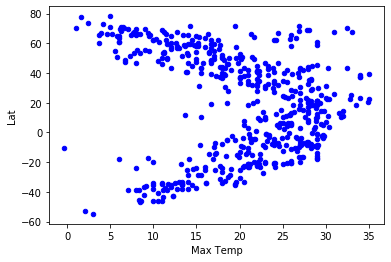

<Figure size 432x288 with 0 Axes>

In [28]:

weather_data_df.plot(kind='scatter',x='Max Temp',y='Lat',color='blue')
plt.show()            
            
#plt.xlabel('Latitude')
#plt.ylabel('Temperature')
plt.savefig('../output_data/output.png')

## Latitude vs. Humidity Plot

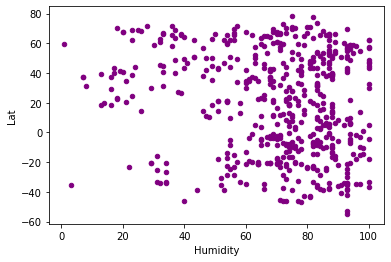

<Figure size 432x288 with 0 Axes>

In [29]:
weather_data_df.plot(kind='scatter',x='Humidity',y='Lat',color='purple')
plt.show() 
plt.savefig('../output_data/humidity.png')

## Latitude vs. Cloudiness Plot

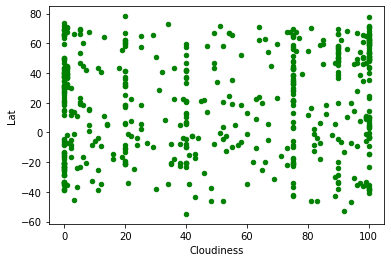

<Figure size 432x288 with 0 Axes>

In [30]:
weather_data_df.plot(kind='scatter',x='Cloudiness',y='Lat',color='green')
plt.show() 
plt.savefig('../output_data/cloudiness.png')

## Latitude vs. Wind Speed Plot

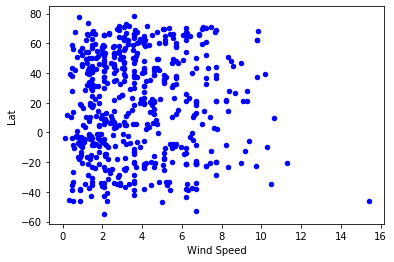

<Figure size 432x288 with 0 Axes>

In [31]:
weather_data_df.plot(kind='scatter',x='Wind Speed',y='Lat',color='blue')
plt.show() 
plt.savefig('../output_data/windspeed.png')

## Linear Regression

In [16]:
# OPTIONAL: Create a function to create Linear Regression plots

In [17]:
# Create Northern and Southern Hemisphere DataFrames
northern_df = weather_data_df.loc[weather_data_df['Lat'] > 0]
southern_df = weather_data_df.loc[weather_data_df['Lat'] < 0]
northern_df.head()
southern_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,avarua,-21.21,-159.78,24.00,60,35,4.10,CK,1592618792
2,ushuaia,-54.80,-68.30,3.00,93,40,2.10,AR,1592618675
3,uarini,-2.99,-65.11,23.42,97,100,0.74,BR,1592618792
4,punta arenas,-53.15,-70.92,2.00,93,92,6.70,CL,1592618635
5,port elizabeth,-33.92,25.57,18.00,34,0,3.60,ZA,1592618792


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

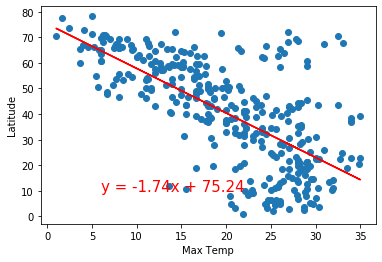

<Figure size 432x288 with 0 Axes>

In [32]:
x_values = northern_df['Max Temp']
y_values = northern_df['Lat']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Max Temp')
plt.ylabel('Latitude')
plt.show()
plt.savefig('../output_data/north_temp.png')

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

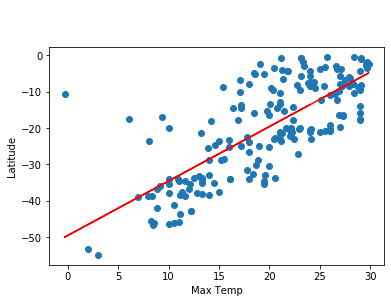

<Figure size 432x288 with 0 Axes>

In [33]:
x_values = southern_df['Max Temp']
y_values = southern_df['Lat']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Max Temp')
plt.ylabel('Latitude')
plt.show()
plt.savefig('../output_data/south_temp.png')

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

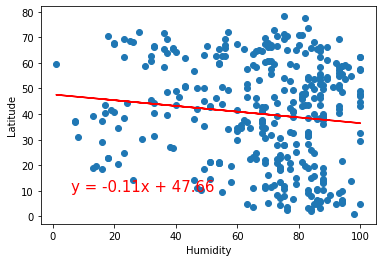

<Figure size 432x288 with 0 Axes>

In [34]:
x_values = northern_df['Humidity']
y_values = northern_df['Lat']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Humidity')
plt.ylabel('Latitude')
plt.show()
plt.savefig('../output_data/north_humid.png')

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

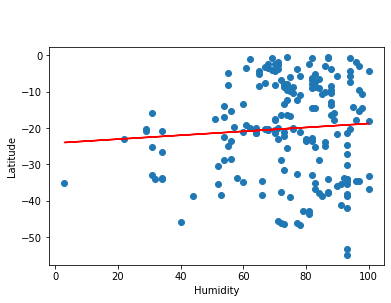

<Figure size 432x288 with 0 Axes>

In [35]:
x_values = southern_df['Humidity']
y_values = southern_df['Lat']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Humidity')
plt.ylabel('Latitude')
plt.show()
plt.savefig('../output_data/south_humid.png')

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

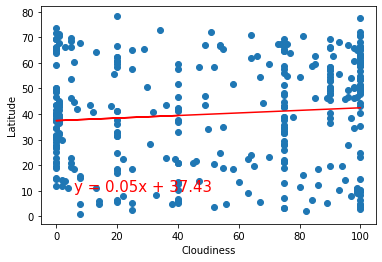

<Figure size 432x288 with 0 Axes>

In [36]:
x_values = northern_df['Cloudiness']
y_values = northern_df['Lat']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Cloudiness')
plt.ylabel('Latitude')
plt.show()
plt.savefig('../output_data/north_cloud.png')

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

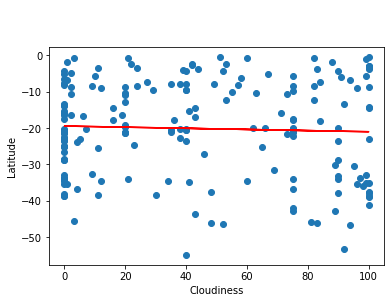

Cloudiness doesn't seems to be affected by the whether or not it is in the north or south hemisphere.
The midpoint, for the southerrn hemisphere, seems to be heaviest at -20 degrees, while in the northern hemisphere, it is at 40 degrees.


<Figure size 432x288 with 0 Axes>

In [37]:
x_values = southern_df['Cloudiness']
y_values = southern_df['Lat']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Cloudiness')
plt.ylabel('Latitude')
plt.show()
plt.savefig('../output_data/south_cloudy.png')
print(f"Cloudiness doesn't seems to be affected by the whether or not it is in the north or south hemisphere.")
print(f"The midpoint, for the southerrn hemisphere, seems to be heaviest at -20 degrees, while in the northern hemisphere, it is at 40 degrees.")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

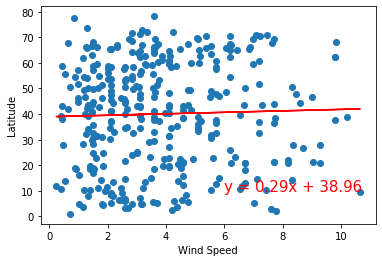

<Figure size 432x288 with 0 Axes>

In [38]:
x_values = northern_df['Wind Speed']
y_values = northern_df['Lat']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Wind Speed')
plt.ylabel('Latitude')
plt.show()
plt.savefig('../output_data/north_wind.png')

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

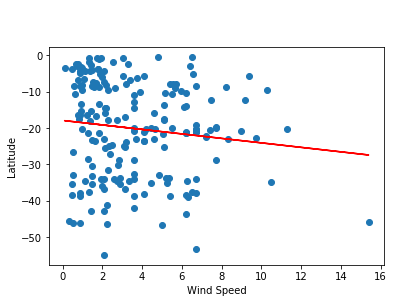

The difference between the Hemispheres, while there is a very slight increase in wind speed north of the equator, there is a more dramatic decrease south of the equator. 
There is also a smaller set of data to choose from in the southern dataframe, which may have skewed the results.


<Figure size 432x288 with 0 Axes>

In [39]:
x_values = southern_df['Wind Speed']
y_values = southern_df['Lat']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Wind Speed')
plt.ylabel('Latitude')
plt.show()
plt.savefig('../output_data/south_wind.png')
print(f"The difference between the Hemispheres, while there is a very slight increase in wind speed north of the equator, there is a more dramatic decrease south of the equator. ")
print(f'There is also a smaller set of data to choose from in the southern dataframe, which may have skewed the results.')